In [1]:
!pip install seaborn

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("ex03_startups.csv")
# remove column State
df = df.drop(columns=['State'])
# data = np.genfromtxt(open("ex03_startups.csv", "r"), delimiter=",", skip_header=1)
# get columns from csv header
# columns = np.genfromtxt(open("ex03_startups.csv", "r"), delimiter=",", dtype=str)[0]
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


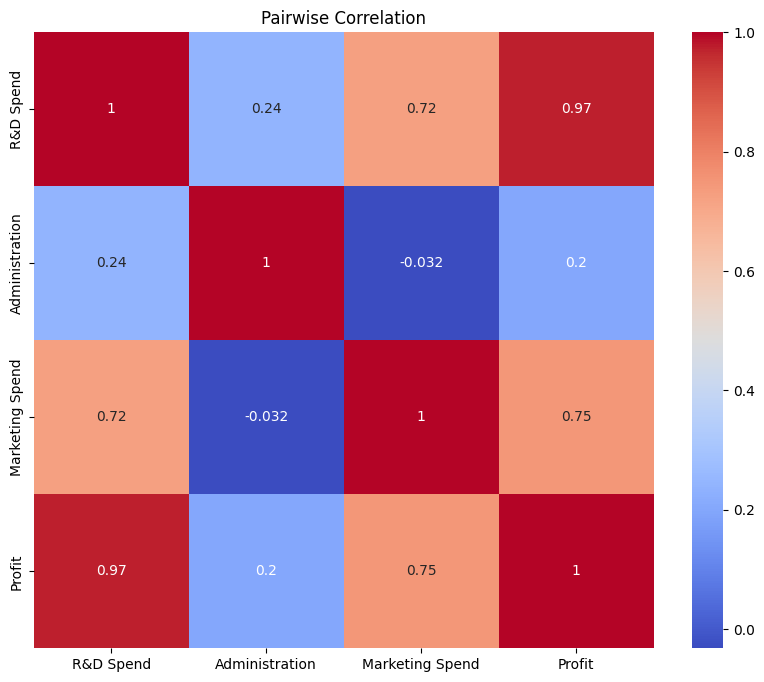

In [4]:
# Plot the data
# print(columns)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation')
plt.show()

In [5]:
!pip install scikit-learn

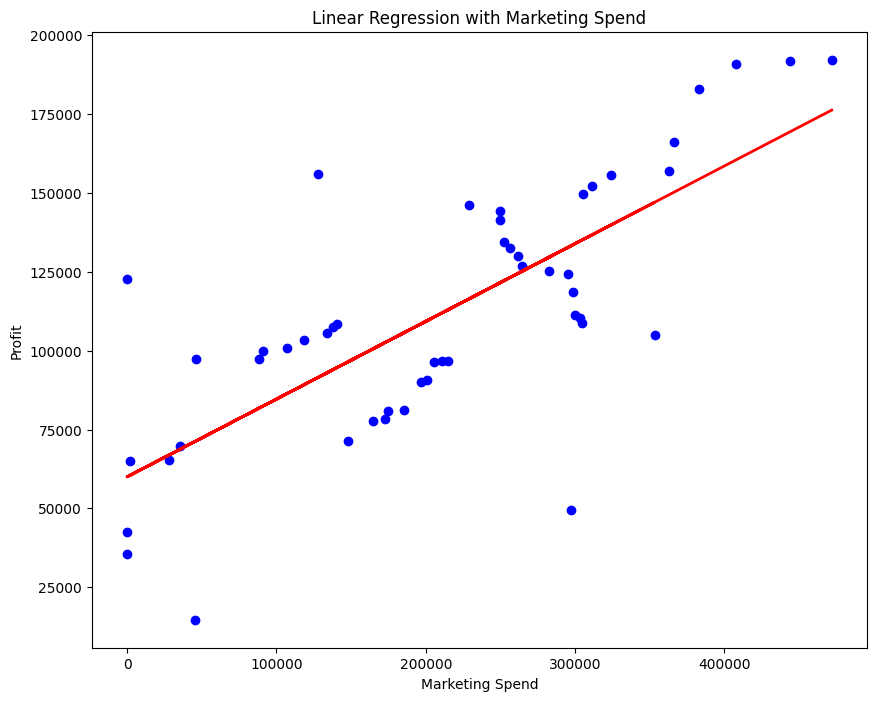

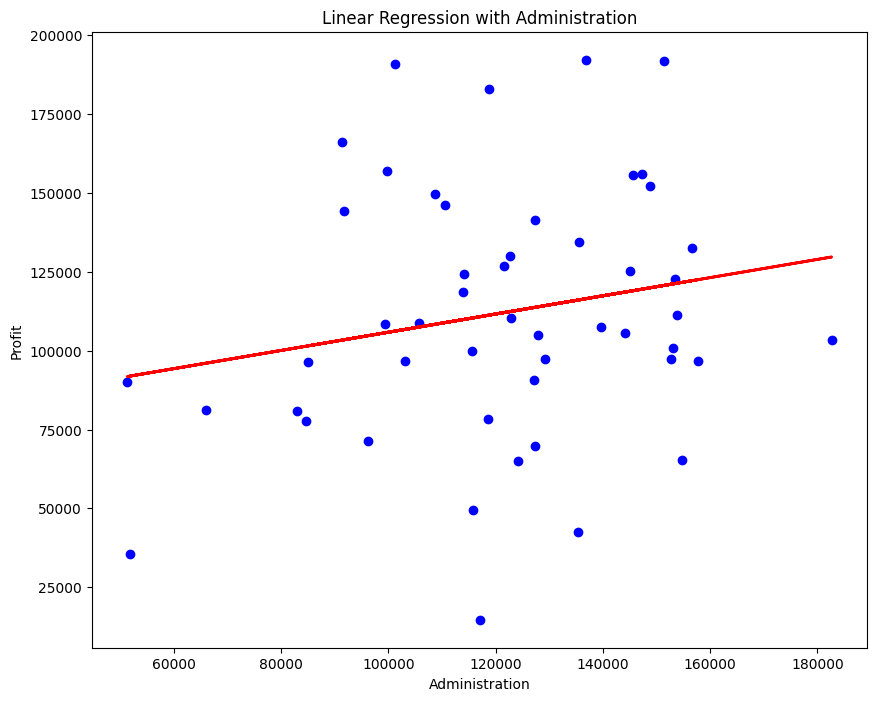

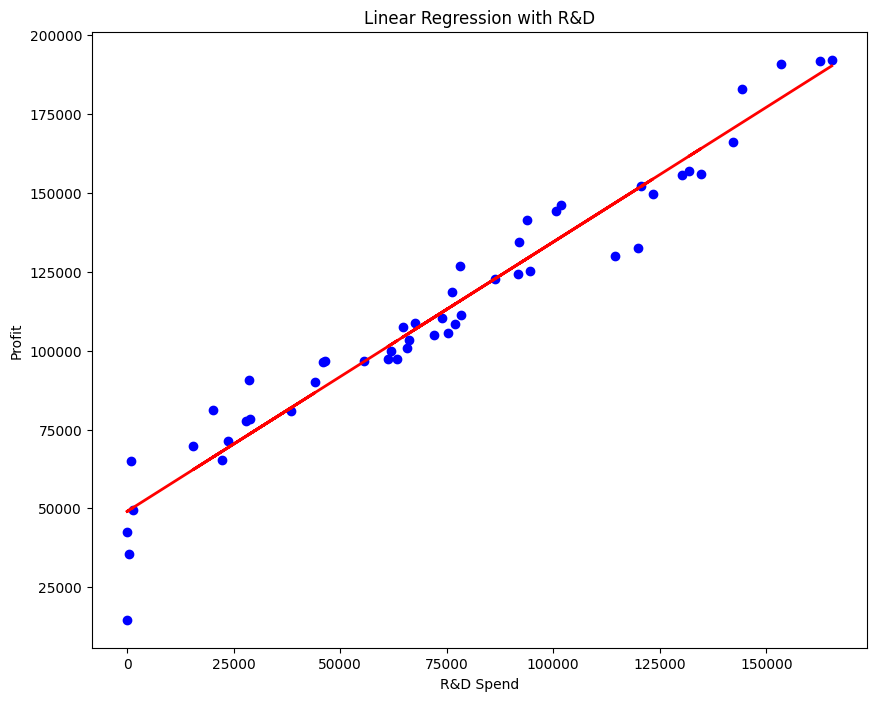

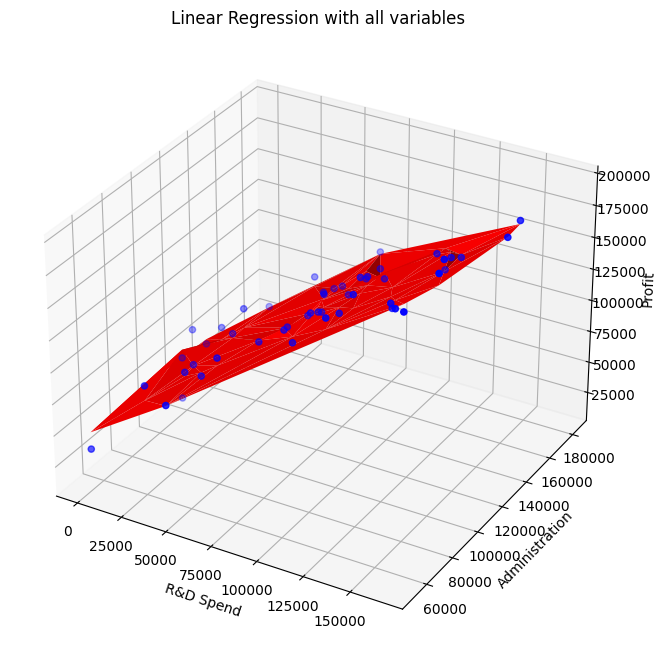

In [6]:
# build linear models with variables Marketing.Spend, Administration, R.D.Spend or all of them to predict profit

# Linear Regression with Marketing.Spend
from sklearn.linear_model import LinearRegression

X_MS = df[['Marketing Spend']]
y = df['Profit']

model_MS = LinearRegression()
model_MS.fit(X_MS, y)
y_pred_MS = model_MS.predict(X_MS)

#Linear Regression with Administration
X_A = df[['Administration']]

model_A = LinearRegression()
model_A.fit(X_A, y)
y_pred_A = model_A.predict(X_A)

#Linear Regression with R&D
X_RD = df[['R&D Spend']]

model_RD = LinearRegression()
model_RD.fit(X_RD, y)
y_pred_RD = model_RD.predict(X_RD)

#Linear Regression with all variables
X = df[['R&D Spend','Administration','Marketing Spend']]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(X_MS, y, color='blue')
plt.plot(X_MS, y_pred_MS, color='red', linewidth=2)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Linear Regression with Marketing Spend')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_A, y, color='blue')
plt.plot(X_A, y_pred_A, color='red', linewidth=2)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Linear Regression with Administration')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_RD, y, color='blue')
plt.plot(X_RD, y_pred_RD, color='red', linewidth=2)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Linear Regression with R&D')
plt.show()

# Plot multi-dimensional prediction for profit
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(X['R&D Spend'], X['Administration'], y, color='blue')
ax.plot_trisurf(X['R&D Spend'], X['Administration'], y_pred, color='red', linewidth=2)
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
ax.set_title('Linear Regression with all variables')
plt.show()

In [7]:
# compute correlation coefficients between predicted and observed data
from scipy.stats import pearsonr

# Marketing Spend
corr_MS, _ = pearsonr(y, y_pred_MS)
print('Pearsons correlation coefficient between Marketing Spend and Profit: %.3f' % corr_MS)

# Administration
corr_A, _ = pearsonr(y, y_pred_A)
print('Pearsons correlation coefficient between Administration and Profit: %.3f' % corr_A)

# R&D
corr_RD, _ = pearsonr(y, y_pred_RD)
print('Pearsons correlation coefficient between R&D and Profit: %.3f' % corr_RD)

# all variables
corr, _ = pearsonr(y, y_pred)
print('Pearsons correlation coefficient between all variables and Profit: %.3f' % corr)

Pearsons correlation coefficient between Marketing Spend and Profit: 0.748
Pearsons correlation coefficient between Administration and Profit: 0.201
Pearsons correlation coefficient between R&D and Profit: 0.973
Pearsons correlation coefficient between all variables and Profit: 0.975


In [8]:
# Predict increase in profit with $100 increase in R&D investment
profit_increase = model_RD.predict([[100]])-model_RD.intercept_
print('Predicted increase in profit with $100 increase in R&D investment: %.3f' % profit_increase)

profit_increase = model.predict([[100, 0, 0]])-model.intercept_
print('Predicted increase in profit with $100 increase in R&D investment: %.3f' % profit_increase)


Predicted increase in profit with $100 increase in R&D investment: 85.429
Predicted increase in profit with $100 increase in R&D investment: 80.572


c:\Users\Jerome\.conda\envs\mlia23\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Jerome\.conda\envs\mlia23\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Problem 14

Don't have R. Damn.

## Problem 15

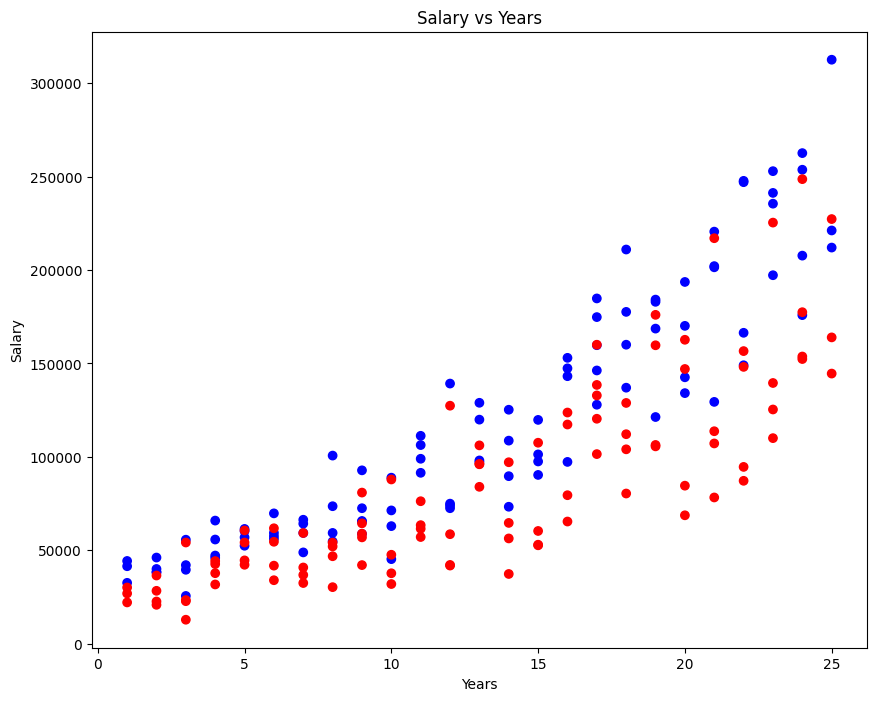

In [9]:
df = pd.read_csv("ex03_salary.csv")

# Plot the data, color based on gender column
plt.figure(figsize=(10, 8))
plt.scatter(df['years'], df['salary'], c=df['gender'].map({"f": "red", "m": "blue"}))
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary vs Years')
plt.show()

Text(0, 0.5, 'Salary')

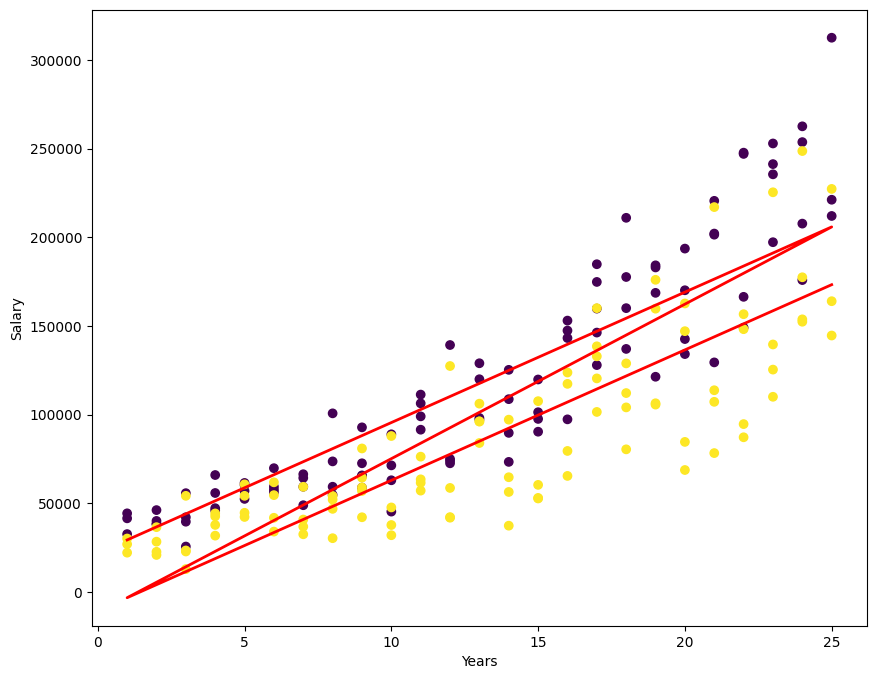

In [10]:
# Linear regression model
# Convert gender variable to numeric
df['gender'] = (df['gender'] !='m').astype(int)

# Linear Regression with years and gender
X = df[['gender', 'years']]
y = df['salary']


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(X['years'], y, c=X['gender'])
plt.plot(X['years'], y_pred, c="red", linewidth=2)
plt.xlabel('Years')
plt.ylabel('Salary')

In [11]:
# get model parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

# Women get about $32k less, and with each year at the company one gets about 7k more; starting pay is 22k

Intercept: 
 21950.075497572878
Coefficients: 
 [-32576.47         7355.99726942]


In [12]:
!pip install statsmodels

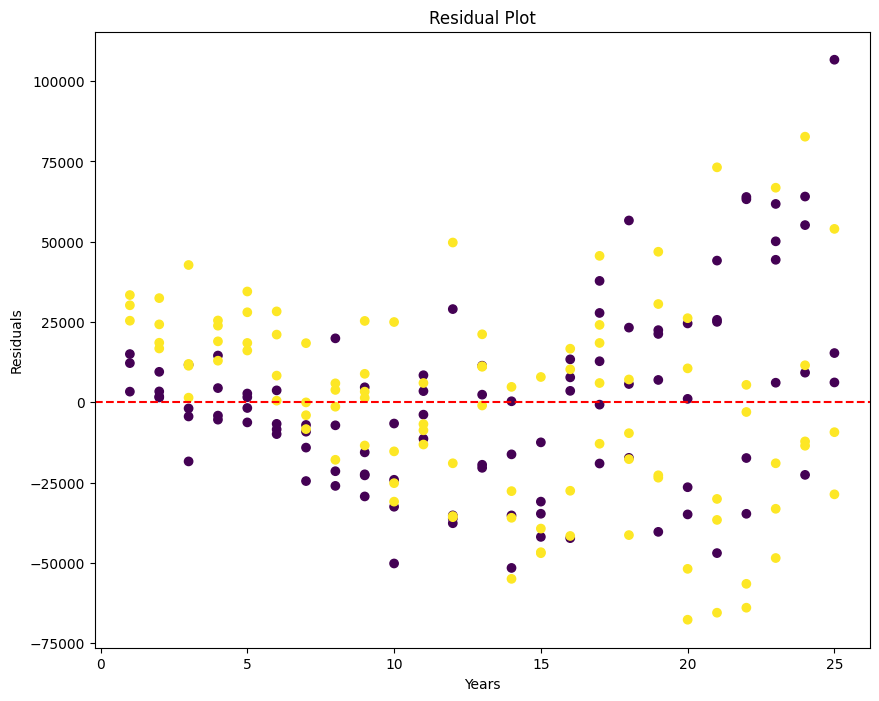

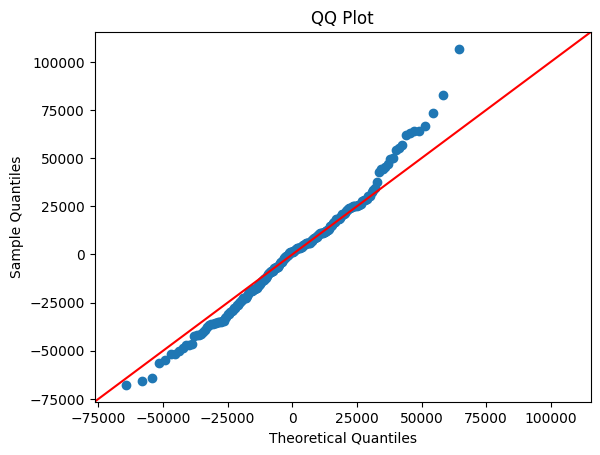

In [13]:
import statsmodels.api as sm

# Residual plot
residuals = y - y_pred

plt.figure(figsize=(10, 8))
plt.scatter(X['years'], residuals, c=X['gender'])
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Years')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# QQ plot
sm.qqplot(residuals, line='45', scale=25000)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot')
plt.show()

Text(0, 0.5, 'Salary')

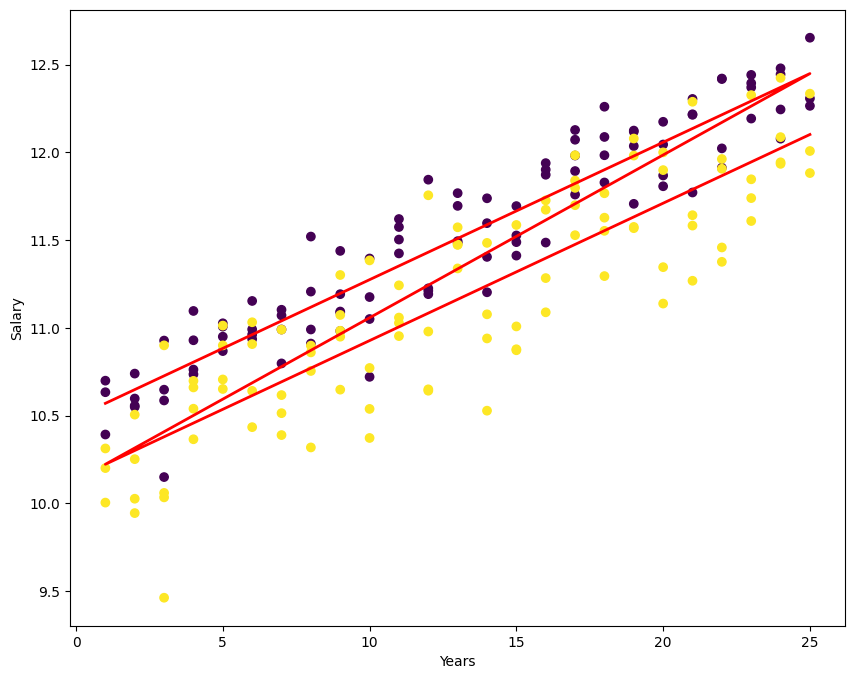

In [14]:
# transform salary using log
df['salary_log'] = np.log(df['salary'])

# Linear Regression with years and gender
X = df[['gender', 'years']]
y = df['salary_log']


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(X['years'], y, c=X['gender'])
plt.plot(X['years'], y_pred, c="red", linewidth=2)
plt.xlabel('Years')
plt.ylabel('Salary')

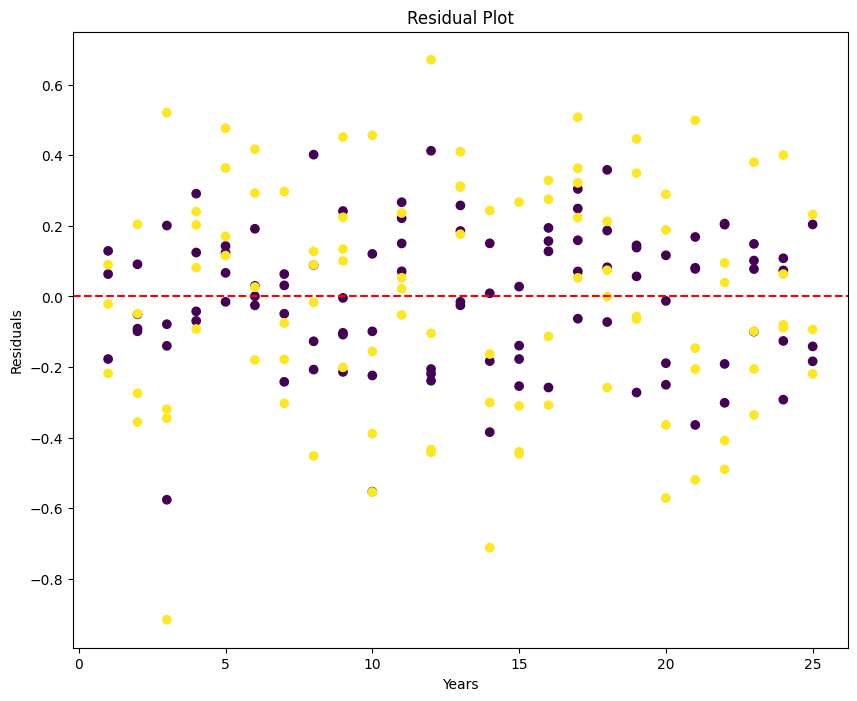

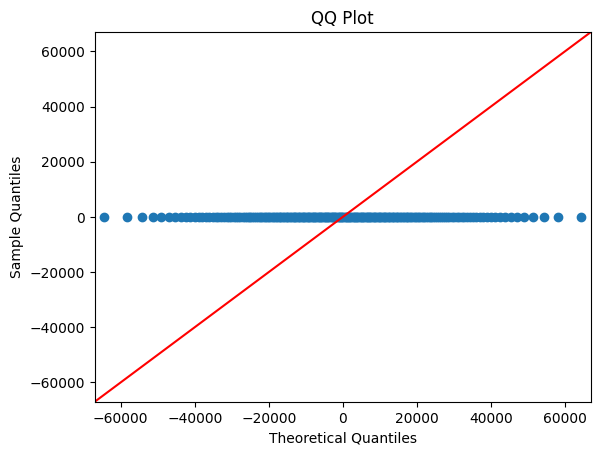

In [15]:
# Residual plot
residuals = y - y_pred

plt.figure(figsize=(10, 8))
plt.scatter(X['years'], residuals, c=X['gender'])
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Years')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# QQ plot
sm.qqplot(residuals, line='45', scale=25000)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot')
plt.show()

Text(0, 0.5, 'Salary')

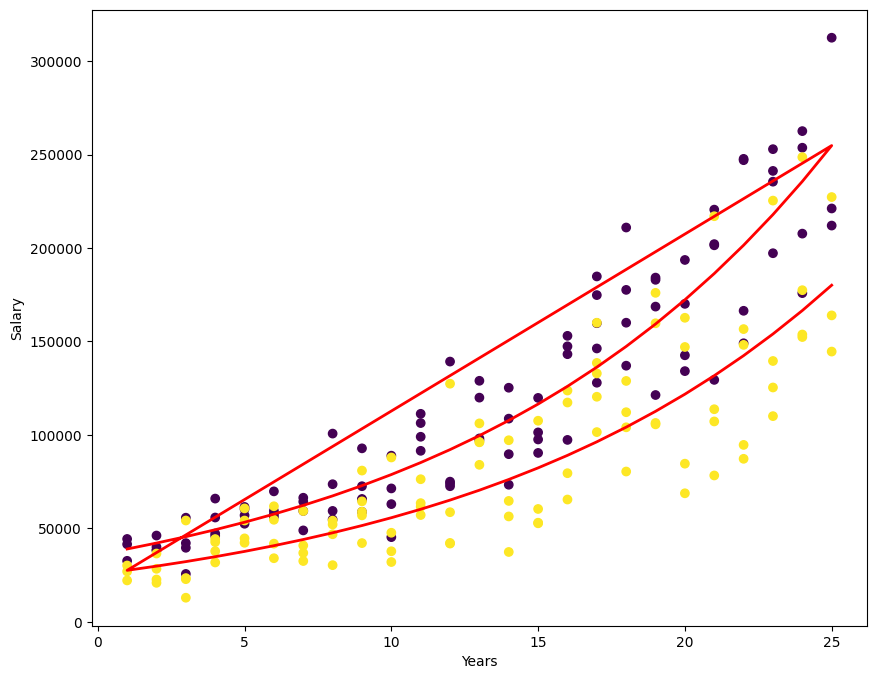

In [16]:
# plot initial data with new regression line
y = df['salary']
plt.figure(figsize=(10, 8))
plt.scatter(X['years'], y, c=X['gender'])
plt.plot(X['years'], np.exp(y_pred), c="red", linewidth=2)
plt.xlabel('Years')
plt.ylabel('Salary')

## Problem 16

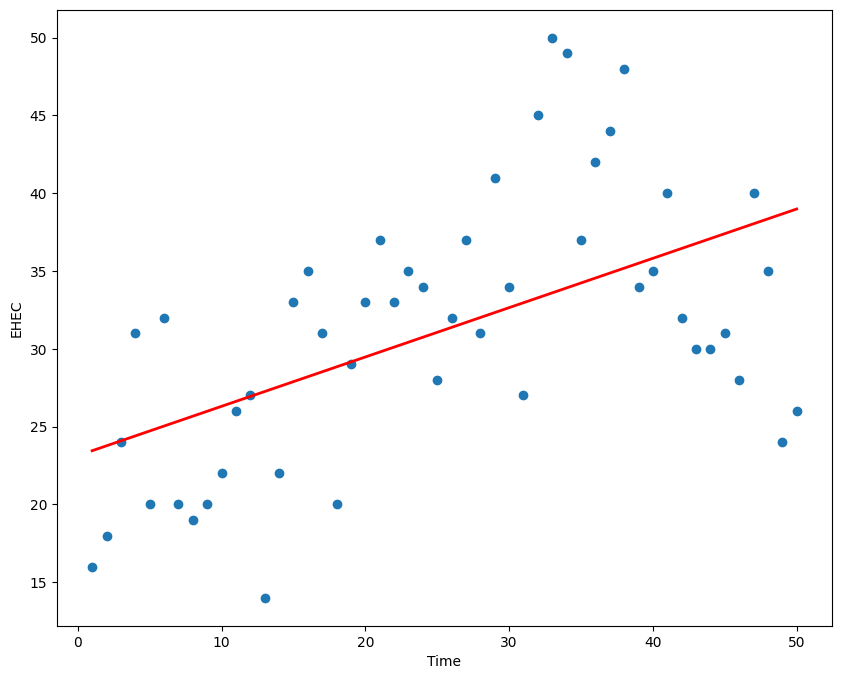

In [17]:
# load the data from ex03_ehec.csv
df = pd.read_csv("ex03_ehec.csv", delimiter=';', header=None)
# print(df[0])
# create linear regression model
lin_model = LinearRegression()
# fit the model
lin_model.fit(df[[0]], df[[1]])
# predict the values
y_lin_pred = lin_model.predict(df[[0]])
# plot the data
plt.figure(figsize=(10, 8))
plt.scatter(df[0], df[1])
plt.plot(df[0], y_lin_pred, c="red", linewidth=2)
plt.xlabel('Time')
plt.ylabel('EHEC')
plt.show()

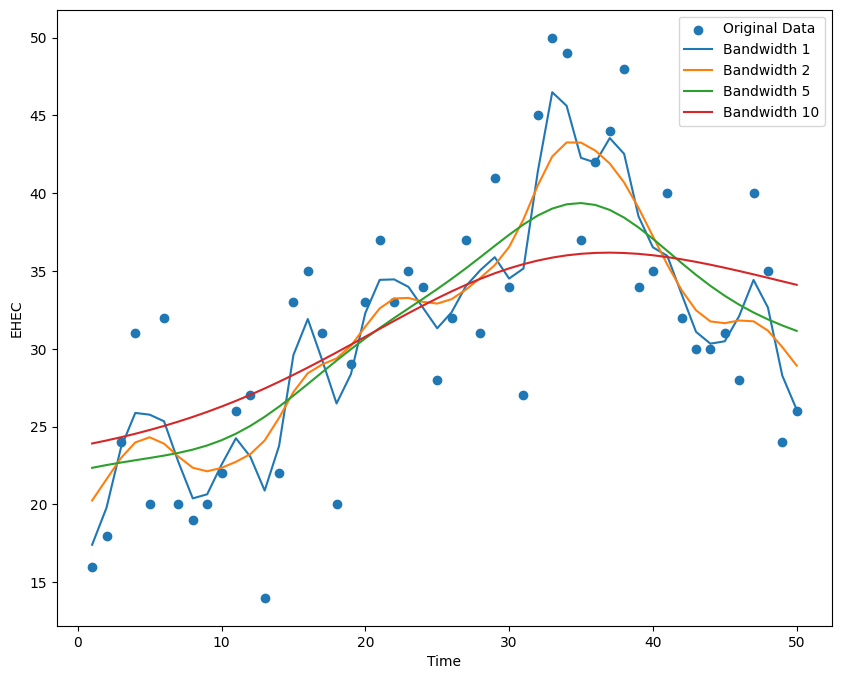

In [18]:
from scipy.stats import gaussian_kde

from statsmodels.nonparametric.kernel_regression import KernelReg


# Original data
x = df[0]
y = df[1]

# Bandwidths
h_values = [1, 2, 5, 10]

# Plot the original data
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='Original Data')

# Compute and plot the Nadaraya-Watson estimates with Gaussian kernel
for h in h_values:
    model = KernelReg(endog=y, exog=x, var_type='c', bw=[h], reg_type='lc')
    y_pred, _ = model.fit()
    plt.plot(x, y_pred, label=f'Bandwidth {h}')

plt.xlabel('Time')
plt.ylabel('EHEC')
plt.legend()
plt.show()

In [19]:
# calculate AIC and BIC for linear regression model
n = len(df[0])
x = df[[0]]
y = df[[1]]
MSE = np.sum((y - y_lin_pred) ** 2) / n
AIC = n * np.log(MSE) + 2 * 2 - n * np.log(n)
BIC = n * np.log(MSE) + 2 * np.log(n) - n * np.log(n)

print('AIC: %.3f' % AIC)
print('BIC: %.3f' % BIC)

AIC: 5.247
BIC: 9.071


C:\Users\Jerome\AppData\Local\Temp\ipykernel_9088\590814401.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('AIC: %.3f' % AIC)
C:\Users\Jerome\AppData\Local\Temp\ipykernel_9088\590814401.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('BIC: %.3f' % BIC)


MSE for bandwidth 1: 33.70726701051997
MSE for bandwidth 2: 36.85318677498631
MSE for bandwidth 5: 36.75384427528811
MSE for bandwidth 10: 43.853886243539115


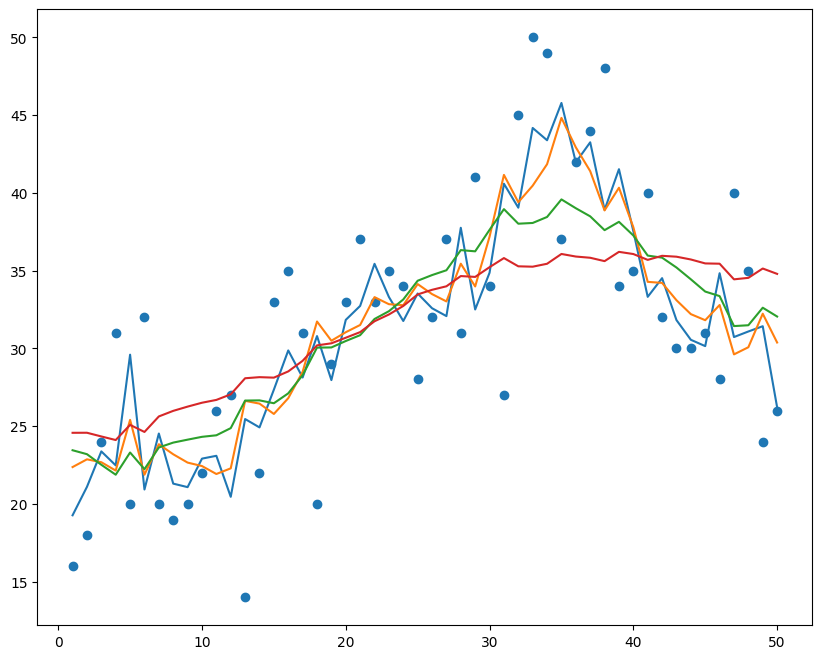

In [29]:
# run leave one out cross validation

# Plot the original data
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='Original Data')

# Perform leave-one-out cross-validation
for h in h_values:
    y_pred = np.zeros(n)
    for i in range(n):
        # Leave one out
        x_loo = np.delete(x, i)
        y_loo = np.delete(y, i)
        # Fit the model
        model = KernelReg(endog=y_loo, exog=x_loo, var_type='c', bw=[h], reg_type='lc')
        x_pred = np.array([x[0][i]])
        y_pred[i] = model.fit(np.array(x_pred))[0]
    # Compute the MSE
    MSE = np.sum((y[1].to_numpy() - y_pred) ** 2) / n
    print(f'MSE for bandwidth {h}: {MSE}')
    # Plot the results
    plt.plot(x, y_pred, label=f'Bandwidth {h}')